<a href="https://colab.research.google.com/github/afham123/Deep-Learning-Project/blob/main/Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [20]:
red_wine_df=pd.read_csv('winequality-red.csv',sep=';')
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [21]:
white_wine_df=pd.read_csv('winequality-white.csv',sep=';')
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


In [ ]:
red_wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
white_wine_df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

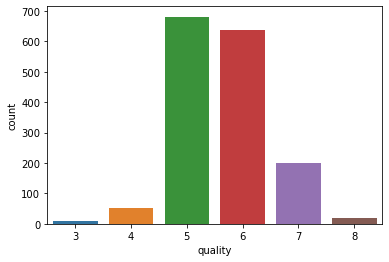

In [ ]:
sns.countplot(red_wine_df['quality'])

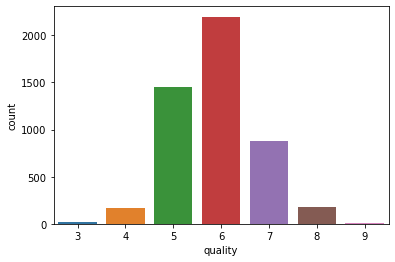

In [ ]:
sns.countplot(white_wine_df['quality'])

In [22]:
#1--> Red, 0 --> White
red_wine_df['Color']=1
white_wine_df['Color']=0
df=pd.concat([red_wine_df,white_wine_df])

In [23]:
len(df)

6497

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


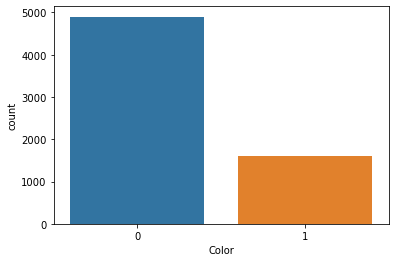

In [ ]:
sns.countplot(df['Color'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 838.6 KB


In [25]:
X=df.drop('quality',axis=1)
y=df['quality']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
from keras.utils.np_utils import to_categorical

In [30]:
cat_y_train=to_categorical(y_train)
cat_y_test=to_categorical(y_test)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [45]:
model=Sequential()

model.add(Dense(512,input_dim=12,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               2560      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [48]:
model.fit(X_train,cat_y_train,epochs=500,validation_data=(X_test,cat_y_test))

Epoch 1/500
143/143 [==============================] - 1s 6ms/step - loss: 0.8229 - accuracy: 0.6780 - val_loss: 1.3720 - val_accuracy: 0.5754
Epoch 2/500
143/143 [==============================] - 1s 6ms/step - loss: 0.7932 - accuracy: 0.6679 - val_loss: 1.3180 - val_accuracy: 0.5733
Epoch 3/500
143/143 [==============================] - 1s 6ms/step - loss: 0.8069 - accuracy: 0.6787 - val_loss: 1.3283 - val_accuracy: 0.5826
Epoch 4/500
143/143 [==============================] - 1s 6ms/step - loss: 0.8245 - accuracy: 0.6736 - val_loss: 1.2748 - val_accuracy: 0.5754
Epoch 5/500
143/143 [==============================] - 1s 6ms/step - loss: 0.7918 - accuracy: 0.6710 - val_loss: 1.2852 - val_accuracy: 0.5749
Epoch 6/500
143/143 [==============================] - 1s 6ms/step - loss: 0.7942 - accuracy: 0.6734 - val_loss: 1.2663 - val_accuracy: 0.5846
Epoch 7/500
143/143 [==============================] - 1s 6ms/step - loss: 0.7771 - accuracy: 0.6750 - val_loss: 1.3265 - val_accuracy: 0.5738

In [49]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.822918,0.678029,1.372039,0.575385
1,0.793188,0.667913,1.317960,0.573333
2,0.806858,0.678689,1.328310,0.582564
3,0.824494,0.673631,1.274816,0.575385
4,0.791783,0.670992,1.285171,0.574872


In [50]:
predictions=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


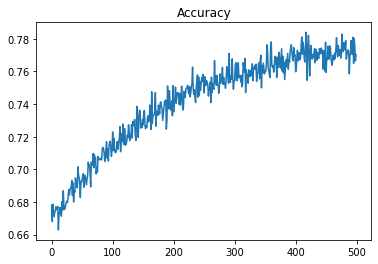

In [51]:
plt.plot(loss_df['accuracy'])
plt.title('Accuracy')
plt.show()

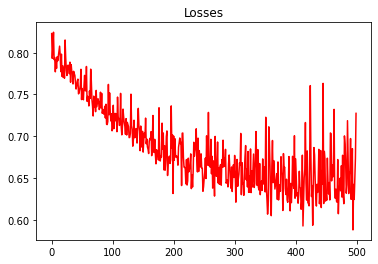

In [52]:
plt.plot(loss_df['loss'],color='red')
plt.title('Losses')
plt.show()

In [53]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.24      0.11      0.15        56
           5       0.68      0.59      0.63       650
           6       0.59      0.70      0.64       869
           7       0.51      0.47      0.49       302
           8       0.49      0.29      0.36        63
           9       0.00      0.00      0.00         2

    accuracy                           0.59      1950
   macro avg       0.36      0.31      0.32      1950
weighted avg       0.59      0.59      0.59      1950



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print(accuracy_score(y_test,predictions))

0.5933333333333334


In [56]:
print(confusion_matrix(y_test,predictions))

[[  0   0   6   2   0   0   0]
 [  1   6  31  15   3   0   0]
 [  2  12 384 241  10   1   0]
 [  2   5 140 606 109   7   0]
 [  0   1   4 143 143  11   0]
 [  0   1   3  24  17  18   0]
 [  0   0   0   1   1   0   0]]


In [60]:
lst1=[]
lst2=[]

for i in range(3,10):
  lst1.append('Predictes_'+str(i))
  lst2.append('Actually_'+str(i))
lst1

['Predictes_3',
 'Predictes_4',
 'Predictes_5',
 'Predictes_6',
 'Predictes_7',
 'Predictes_8',
 'Predictes_9']

In [61]:
confusion_matrix_df=pd.DataFrame(index=lst2,columns=lst1,data=confusion_matrix(y_test,predictions))
confusion_matrix_df

,Predictes_3,Predictes_4,Predictes_5,Predictes_6,Predictes_7,Predictes_8,Predictes_9
Actually_3,0,0,6,2,0,0,0
Actually_4,1,6,31,15,3,0,0
Actually_5,2,12,384,241,10,1,0
Actually_6,2,5,140,606,109,7,0
Actually_7,0,1,4,143,143,11,0
Actually_8,0,1,3,24,17,18,0
Actually_9,0,0,0,1,1,0,0


In [63]:
model.save('My_model.h5')

In [ ]:
Made by : Afham Fardeen
email : afhamfardeen98@gmail.com
phone num : 7004901819